<a href="https://colab.research.google.com/github/itzThillaiC/Tensorflow_models/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**        LSTM for Time series analysis**

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
def prepare_data(time_data,n_features):
  x,y=[],[]
  for i in range(len(time_data)):
    end_ix=i+n_features
    if end_ix >len(time_data)-1:
      break
    seq_x,seq_y=time_data[i:end_ix],time_data[end_ix]
    x.append(seq_x)
    y.append(seq_y)
  
  return np.array(x),np.array(y)
    


In [4]:
time_data=[110,125,133,146,158,172,187,196,210]
n_steps=3
x,y=prepare_data(time_data,n_steps)

In [5]:
print(x),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [6]:
n_features=1
x=x.reshape((x.shape[0],x.shape[1],n_features))

In [7]:
x.shape

(6, 3, 1)

LSTM model

In [8]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [9]:
model.fit(x,y,epochs=300)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 33920.0039
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 33490.6250
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 33147.4414
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 32875.0000
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 32638.9707
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 32421.6973
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 32210.7500
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 32000.9512
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 31788.3535
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 31565.8047
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 31326.5098
Epoch 12/300
1/1 [==============================] - 0s 11ms/step - loss: 31066.0215
Epo

**Predicting for next 10 days**

In [24]:
x_input =np.array([187,196,210])
temp_input=list(x_input)
lst_out=[]
i=0
while(i<10):
  if(len(temp_input)>3):
    x_input =np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    
    x_input=x_input.reshape((1,n_steps,n_features))
    yhat=model.predict(x_input,verbose=0)
    print("{} day input {}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input=temp_input[1:]
    lst_out.append(yhat[0][0])
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_out.append(yhat[0][0])
    i=i+1

print(lst_out)


    
    

[222.51906]
1 day input [196.         210.         222.51905823]
1 day input [[232.39505]]
2 day input [210.         222.51905823 232.39505005]
2 day input [[245.05296]]
3 day input [222.51906 232.39505 245.05296]
3 day input [[256.35904]]
4 day input [232.39505 245.05296 256.35904]
4 day input [[266.9589]]
5 day input [245.05296 256.35904 266.9589 ]
5 day input [[278.91364]]
6 day input [256.35904 266.9589  278.91364]
6 day input [[289.99872]]
7 day input [266.9589  278.91364 289.99872]
7 day input [[301.1846]]
8 day input [278.91364 289.99872 301.1846 ]
8 day input [[312.94012]]
9 day input [289.99872 301.1846  312.94012]
9 day input [[324.32608]]
[222.51906, 232.39505, 245.05296, 256.35904, 266.9589, 278.91364, 289.99872, 301.1846, 312.94012, 324.32608]


In [25]:
time_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [26]:
lst_out

[222.51906,
 232.39505,
 245.05296,
 256.35904,
 266.9589,
 278.91364,
 289.99872,
 301.1846,
 312.94012,
 324.32608]

**Visualizing the output**

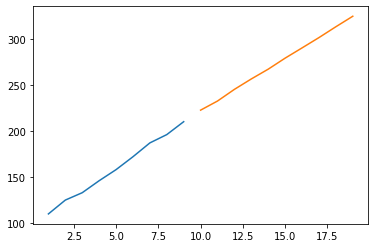

In [27]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,time_data)
plt.plot(day_pred,lst_out)